## Лабораторная работа № 1 - Работа с библиотекой pandas в Python. Упражнения

In [2]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [4]:
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
copyData = data
copyData[['BMI', 'DiabetesPedigreeFunction']].fillna(value=data.mean(), inplace=True)
copyData.fillna(value=data.median(), inplace=True)
print(copyData)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Class  
0                       0.627   50      1  
1                      

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age       Class  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [29]:
print(data[(data['Class']==1) & (data['Age']>50)].shape[0])

38


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [ ]:
print(data.sort_values(by=['Pregnancies'], ascending=False).head(3))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
159           17    163.0           72.0           41.0    114.0  40.9   
88            15    136.0           70.0           32.0    110.0  37.1   
298           14    100.0           78.0           25.0    184.0  36.6   

     DiabetesPedigreeFunction  Age  Class  
159                     0.817   47      1  
88                      0.153   43      1  
298                     0.412   46      1  


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [ ]:
print(len(data[data['Pregnancies']>=3][data['Age']>30][data['Age']<40]))

115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [30]:
print((data[data['BloodPressure']>79][data['BloodPressure']<90].shape[0])*100/(data.shape[0]))

18.880208333333332


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [10]:
print((data[data['BMI']>=30][data['BloodPressure']>data['BloodPressure'].mean()].shape[0]))

251


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [12]:
diabTrue = data[data['Class']==1]
diabFalse = data[data['Class']==0]
print(diabTrue['Glucose'].mean()>diabFalse['Glucose'].mean())


True


In [13]:
print(diabTrue['BloodPressure'].mean()>diabFalse['BloodPressure'].mean())


True


In [14]:
print(diabTrue['Insulin'].mean()>diabFalse['Insulin'].mean())


True


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

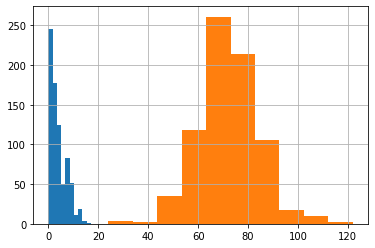

In [25]:
data['Pregnancies'].hist()
data['BloodPressure'].hist()

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

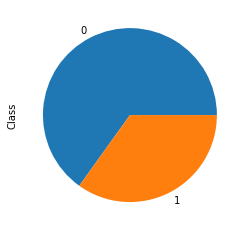

In [16]:
data['Class'].value_counts().plot.pie()

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

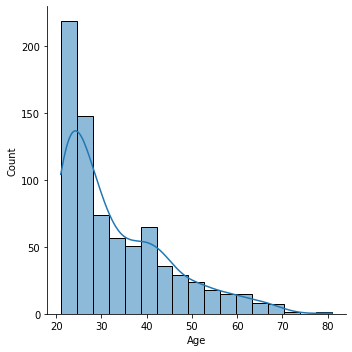

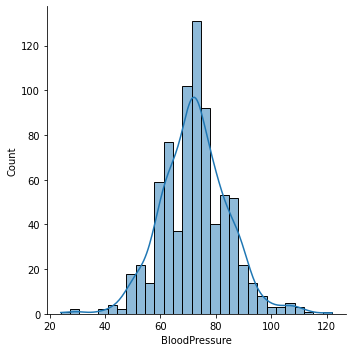

In [27]:
sns.displot (data['Age'], kde=True)
sns.displot (data['BloodPressure'], kde=True)

__Задание 13.__

Постройте следующий график: среднее число больных диабетом в зависимости от числа беременностей.

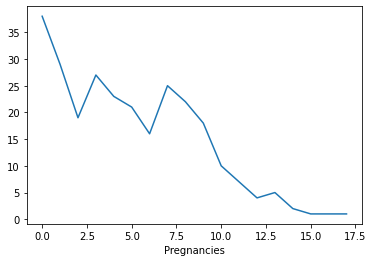

In [18]:
diabet=data[data['Class']==1]
diabet.groupby(['Pregnancies']).sum()['Class'].plot()


__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [19]:
def wasPregnant(row):
  if row['Pregnancies']==0:
    return 0
  else:
    return 1
data['wasPregnant']=data.apply(wasPregnant,axis=1)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1,1


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [20]:
pregTrue = data[data['wasPregnant']==1]
pregFalse = data[data['wasPregnant']==0]
print((pregTrue[pregTrue['Class']==1]).shape[0]/(pregTrue.shape[0])*100)
print((pregFalse[pregFalse['Class']==1]).shape[0]/(pregFalse.shape[0])*100)

35.0076103500761
34.234234234234236


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [22]:
def bodyType(row):
  if row['BMI']<18.5:
    return 'Underwight'
  elif 18.5<=row['BMI']<=24.9:
    return 'Normal weight'
  elif 25<=row['BMI']<=29.9:
    return 'Overweight'
  elif row['BMI']>=30:
    return 'Obesity' 
data['bodyType']=data.apply(bodyType,axis=1)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0,1,Overweight
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1,Obesity
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0,1,Obesity
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1,Obesity
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1,1,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [23]:
healthy = data[data['bodyType']=='Normal weight'][data['BloodPressure']>79][data['BloodPressure']<90]
print((healthy[healthy['Class']==1]).shape[0]/(healthy).shape[0]*100)

10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
